In [1]:
import os
import math
import random
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_csv(csv_path):
    with open(csv_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        csv_data_with_header = [row[:1] + row[-5:] for row in reader]
        _csv_header_row = csv_data_with_header[0]
        csv_raw_data = csv_data_with_header[1:]

    # 정수 데이터가 str로 저장되어 있는 것들을 int로 변환
    csv_data = []
    for sample in csv_raw_data:
        csv_data.append(list(map(int, sample)))

    # index 추출
    csv_header = dict()
    for idx, elem in enumerate(_csv_header_row):
        csv_header[elem] = idx

    return csv_header, np.array(csv_data)

### Data Loading

In [36]:
csv_path_list = [Path("2018_final_dataset.csv")]

# csv_path_list = [Path("drive/MyDrive/github-corr/2018_final_dataset.csv"),
#                  Path("drive/MyDrive/github-corr/2019_final_dataset.csv"),
#                  Path("drive/MyDrive/github-corr/2020_final_dataset.csv")]

In [37]:
MIN_STAR = 10
MIN_CITATION = 10
MAX_STAR = 10000
MAX_CITATION = 10000

In [38]:
csv_data = np.empty([0, 6])
for _csv_path in csv_path_list:
    _, _csv_data = read_csv(_csv_path)
    csv_data = np.concatenate((csv_data, _csv_data), axis=0)
csv_data = np.asarray(csv_data)

print(csv_data[:3])

outlier_indices = np.logical_and.reduce((
    csv_data[:, 1] <= MAX_STAR,
    csv_data[:, 1] >= MIN_STAR,
    csv_data[:, -1] <= MAX_CITATION,
    csv_data[:, -1] >= MIN_CITATION
    ))

outlier_csv_data = csv_data[outlier_indices, :]

print(outlier_csv_data[:3])

[[  0. 291.  20.  52.   5.  84.]
 [  1. 504.  18. 123.  31. 352.]
 [  2.   9.   2.   0.   1.  11.]]
[[  0. 291.  20.  52.   5.  84.]
 [  1. 504.  18. 123.  31. 352.]
 [  3. 279.  13.  60.  14. 153.]]


(194, 6)


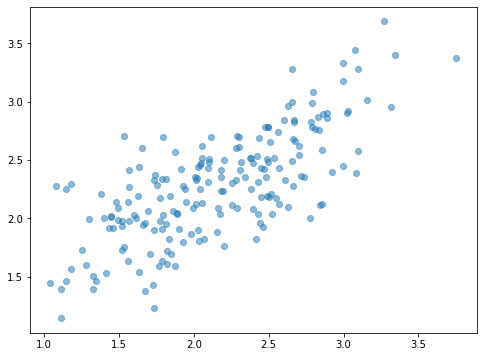

In [39]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

print(outlier_csv_data.shape)


ax.scatter(np.log10(outlier_csv_data[:, 1]),
           np.log10(outlier_csv_data[:, -1]), alpha=0.5)

# ax.plot_surface(outlier_csv_data[:, 1],
#            outlier_csv_data[:, 3],
#            outlier_csv_data[:, -1],
#            cmap="inferno", s=5, alpha=0.5)